In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60, test_size=140)
print(X_train.shape)
print(y_train.shape)
true_coefficient

(60, 30)
(60,)


array([ 0.        ,  0.        ,  2.12227127,  0.        ,  0.        ,
       49.25507875,  0.        ,  0.        ,  0.        , 15.07583458,
        0.        ,  0.        , 32.29058037,  0.        ,  0.        ,
        8.41487791,  0.        ,  0.        ,  0.        , 64.56924673,
        0.        ,  0.        ,  0.        , 70.85764943,  0.        ,
       34.28961765, 88.17735659,  0.        , 80.81291382,  0.        ])

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
print(f"score train={linear_regression.score(X_train,y_train):.2f}")
print(f"score train={linear_regression.score(X_test,y_test):.2f}")

score train=0.88
score train=0.22


In [5]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.5985284495875146


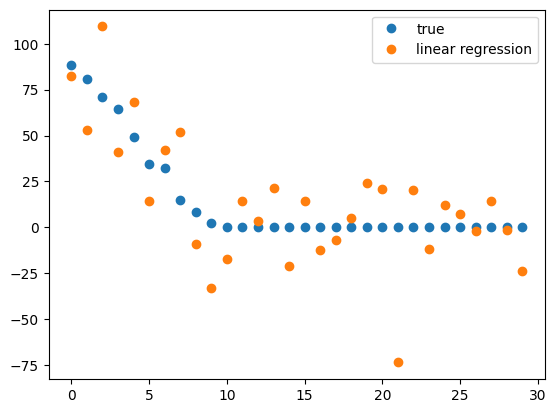

In [6]:
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

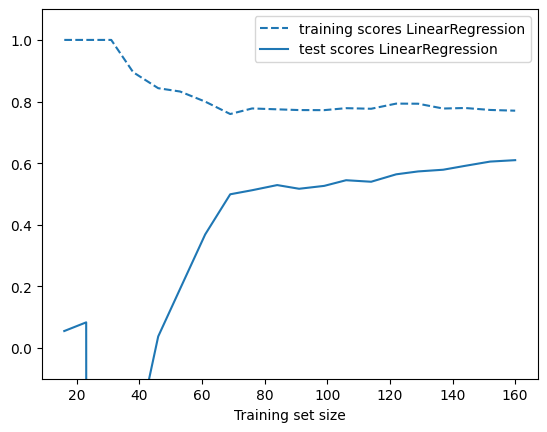

In [7]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)

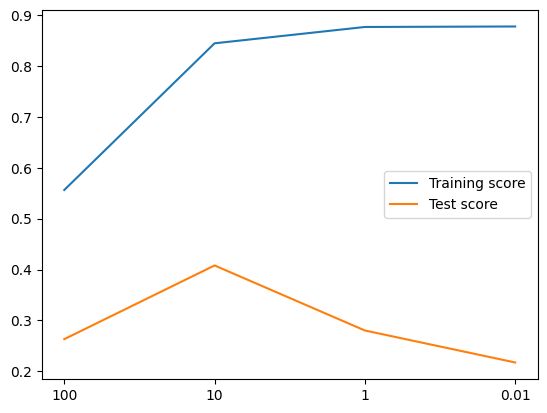

In [33]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_score=[]
test_score=[]
alphas = [100,10,1,0.01]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    training_score.append(ridge.score(X_train,y_train))
    test_score.append(ridge.score(X_test,y_test))
    ridge_models[alpha] = ridge
plt.figure()
plt.plot(training_score,label="Training score")
plt.plot(test_score,label="Test score")
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc="best")

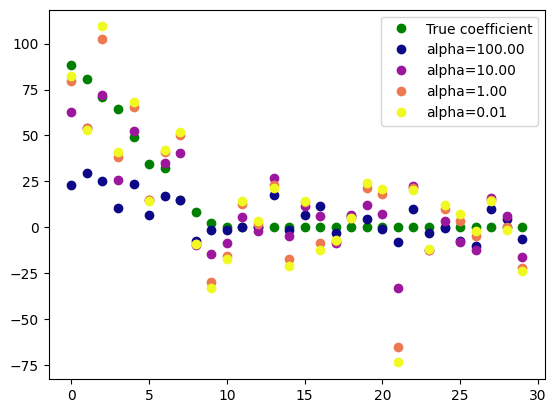

In [46]:
plt.figure()
plt.plot(true_coefficient[coefficient_sorting],"o",c="g",label="True coefficient")
for i, alpha in enumerate(alphas):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting],"o",label=f"alpha={alpha:.2f}",c=plt.cm.plasma(i/3))
plt.legend(loc="best")


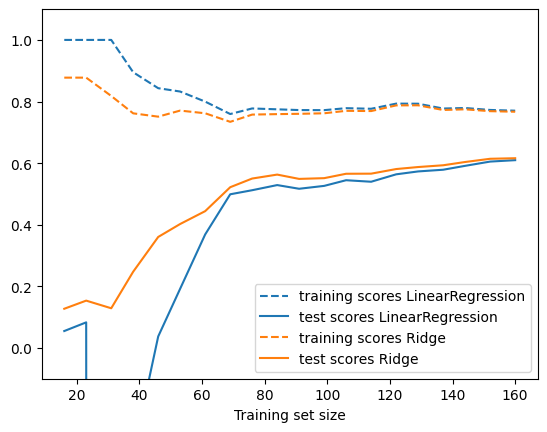

In [53]:
plt.figure()
plot_learning_curve(LinearRegression(),X,y)
plot_learning_curve(Ridge(alpha=10),X,y)

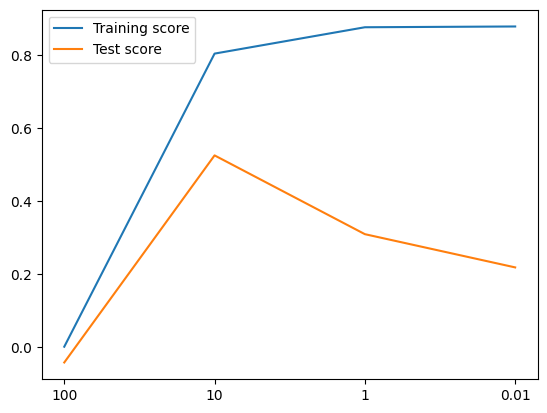

In [54]:
from sklearn.linear_model import Lasso
lasso_models = {}
training_score=[]
test_score=[]
alphas = [100,10,1,0.01]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    training_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_score,label="Training score")
plt.plot(test_score,label="Test score")
plt.xticks(range(len(alphas)),alphas)
plt.legend(loc="best")

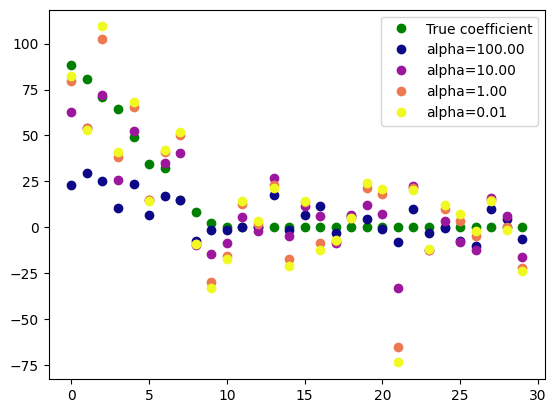

In [55]:
plt.figure()
plt.plot(true_coefficient[coefficient_sorting],"o",c="g",label="True coefficient")
for i, alpha in enumerate(alphas):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting],"o",label=f"alpha={alpha:.2f}",c=plt.cm.plasma(i/3))
plt.legend(loc="best")

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+01, tolerance: 4.958e+01
  model = cd_fast.enet_coordinate_descent(


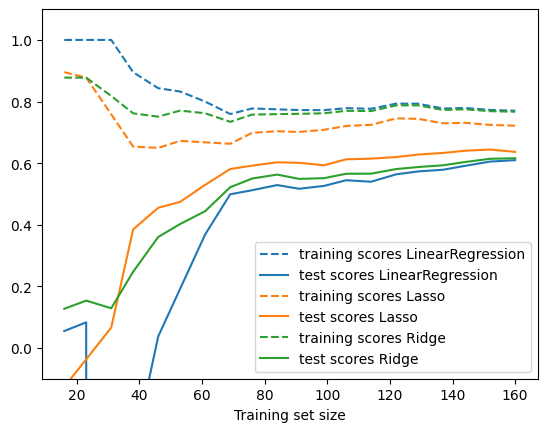

In [59]:
plt.figure()
plot_learning_curve(LinearRegression(),X,y)
plot_learning_curve(Lasso(alpha=10),X,y)
plot_learning_curve(Ridge(alpha=10),X,y)

Object `plt.get_cmap("Spectral")` not found.


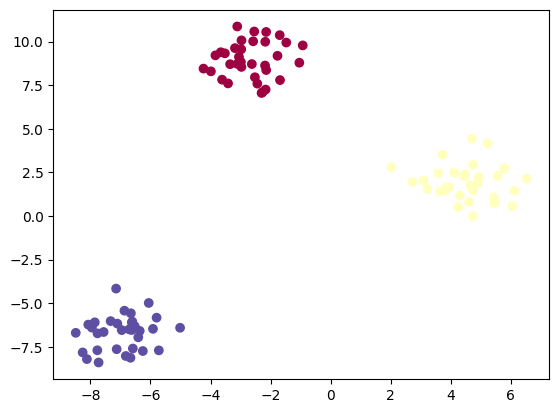

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
plt.scatter(X[:,0],X[:,1],c=plt.get_cmap("Spectral")(y/2))

In [89]:
from sklearn.svm import LinearSVC
Linear_svc = LinearSVC()
Linear_svc.fit(X,y)
Linear_svc.intercept_.shape

(3,)

(-10.0, 12.0)

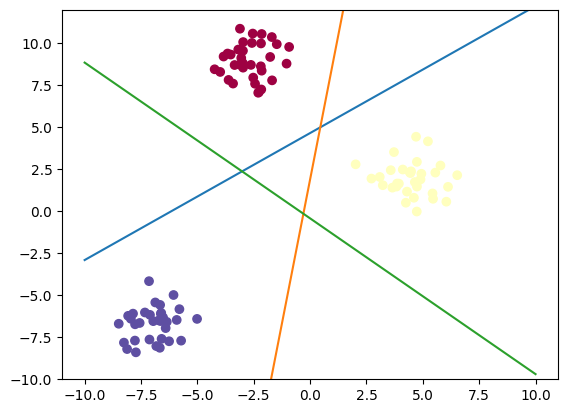

In [102]:
plt.scatter(X[:,0],X[:,1],c=plt.get_cmap("Spectral")(y/2))
line=np.linspace(-10,10)
for coef, intercept in zip(Linear_svc.coef_, Linear_svc.intercept_):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1]) #X[:,0]*coef[0]+X[:,1]*coef[1]+intercept
plt.ylim(-10,12)